# Classification model using Random Forest

### 1. Import libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import os

### 2. Upload RNA data

In [52]:
# os.chdir("../../Data")

In [53]:
data = pd.read_csv("clinic_and_RNA_data_raw_NIVOLUMAB.csv")
data.head()

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,11,12,21,30,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,SUBJID,Cohort,Arm,MAF_Tumor_ID,MAF_Normal_ID,CNV_ID,RNA_ID,CD8_IF_ID,Sex,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,RCC10-20,CM-010,NIVOLUMAB,NaN,NaN,NaN,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,0001 00020,Male,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,RCC10-97,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00097-T_v4_Exome_OnPrem,RP-1458_RCCBMS-00097-N_v1_Exome_OnPrem,RCCBMS-00097-T.called.seg,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,0001 00097,Female,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,RCC10-141,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00141-T_v1_Exome_OnPrem,RP-1458_RCCBMS-00141-N_v1_Exome_OnPrem,RCCBMS-00141-T.called.seg,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,0014 00141,Female,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,RCC10-99,CM-010,NIVOLUMAB,NaN,NaN,NaN,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,0015 00099,Male,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,RCC10-163,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00163-T_v1_Exome_OnPrem,RP-1458_RCCBMS-00163-N_v1_Exome_OnPrem,RCCBMS-00163-T.called.seg,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,NaN,Male,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


In [54]:
Y = []
X = []
for patient in range(len(data)): # Recorro pacientes
  print('patient: ' +str(patient))
  final_matrix = pd.read_csv('Patients/final_matrix_'+str(patient)+'.csv')
  if data.PFS[patient] < 3:
    Y.append(0)
  else:
    Y.append(1)
  if 'Unnamed: 0' in final_matrix.columns:
    final_matrix = final_matrix.drop(columns=['Unnamed: 0'])
#  print(final_matrix)
  X.append(final_matrix.to_numpy().flatten())
#print(X[0])
print(Y)

patient: 0
patient: 1
patient: 2
patient: 3
patient: 4
patient: 5
patient: 6
patient: 7
patient: 8
patient: 9
patient: 10
patient: 11
patient: 12
patient: 13
patient: 14
patient: 15
patient: 16
patient: 17
patient: 18
patient: 19
patient: 20
patient: 21
patient: 22
patient: 23
patient: 24
patient: 25
patient: 26
patient: 27
patient: 28
patient: 29
patient: 30
patient: 31
patient: 32
patient: 33
patient: 34
patient: 35
patient: 36
patient: 37
patient: 38
patient: 39
patient: 40
patient: 41
patient: 42
patient: 43
patient: 44
patient: 45
patient: 46
patient: 47
patient: 48
patient: 49
patient: 50
patient: 51
patient: 52
patient: 53
patient: 54
patient: 55
patient: 56
patient: 57
patient: 58
patient: 59
patient: 60
patient: 61
patient: 62
patient: 63
patient: 64
patient: 65
patient: 66
patient: 67
patient: 68
patient: 69
patient: 70
patient: 71
patient: 72
patient: 73
patient: 74
patient: 75
patient: 76
patient: 77
patient: 78
patient: 79
patient: 80
patient: 81
patient: 82
patient: 83
pa

### 3. Train-Test dataset split

In [55]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.10, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 162
Target column size of the training set: 162
Test set size: 19
Target column size of the test set: 19


### 4. Select the parameters of the model and fit it

In [56]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [6,8,9,10,11,12,13,14],
              'random_state':[125],
              'n_estimators': [10, 11,12,13,14,15,16,17,18],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

KeyboardInterrupt: 

In [ ]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=12, random_state=125)

In [ ]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6080672268907563


### 5. Prediction

In [ ]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [ ]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [ ]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.8596491228070176
Final accuracy on the testing dataset: 0.4


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65 15]
 [ 9 82]]
Input data:  [1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1]


In [ ]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.85      0.90      0.87        91

    accuracy                           0.86       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.86      0.86      0.86       171



In [ ]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[1 4]
 [2 3]]
Input data:  [0 1 0 0 0 1 1 1 1 0]
Prediction:        [0 1 1 1 1 0 1 1 0 1]


In [ ]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



Features with relevance over 0:  146
Features with relevance over 0.005:  89


C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


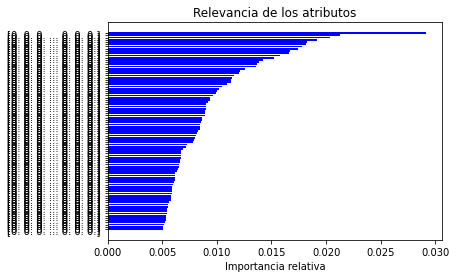

[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. ... 0. 0. 0.] = 0.0
[0. 0. 0. 

In [ ]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.005), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.005: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.